In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score ,auc, recall_score, accuracy_score, roc_curve, f1_score
import time
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import naive_bayes
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# New Section

**loading the datset**

In [ ]:
#df = pd.read_csv('creditcard.csv') #When reading csv file from local system for anaconda
#from google.colab import files
#uploaded = files.upload()

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd 
df=pd.read_csv('/content/creditcard.csv')

**Exploratory data analysis (EDA)**

This is an approach to analyse data using visual techniques

In [ ]:
#number of rows and columns of a given DataFrame
df.shape

(284807, 31)

In [ ]:
#The information contains the column labels, column data types, memory usage, range index, and the number of cells in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#displays summary statistics for a dataframe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#Return a Series containing counts of unique values
#1 for fraud , 0 for Normal
pd.value_counts(df['Class'])

0    284315
1       492
Name: Class, dtype: int64

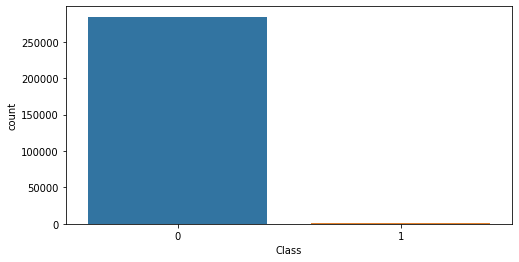

In [ ]:
#ploting no of fraud and non fraud transactions
plt.figure(figsize=(8,4))
sns.countplot(x='Class',data=df) #used to Show the counts of observations in each categorical bin using bars

**Data Visualisation**
It is a graphical representation that contains the information and the data

Since the Time and Amount are the only non-anonymised features, we plot them to gain better understanding of
their spread.

Text(0, 0.5, 'amount')

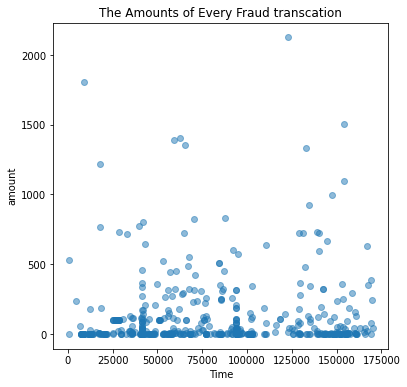

In [ ]:
#the amounts of every fraud transaction
#A scatter plot is a diagram where each value in the data set is represented by a dot
plt.figure(figsize=(6,6))
plt.scatter(df['Time'][df.Class==1], df['Amount'][df.Class==1], alpha=0.5)#shows how one variable is affected by other 
#You can adjust the transparency of the dots with the alpha argument.
plt.title('The Amounts of Every Fraud transcation')
plt.xlabel('Time')
plt.ylabel('amount')

Text(0, 0.5, 'amount')

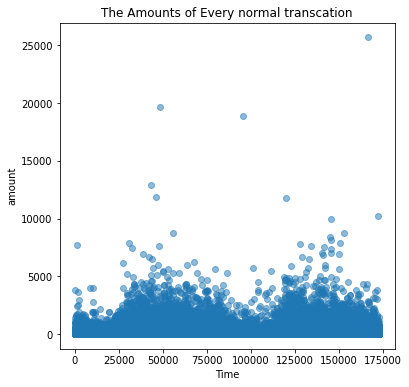

In [ ]:
#The Amounts of Every normal transcation
plt.figure(figsize=(6,6))
plt.scatter(df['Time'][df.Class==0], df['Amount'][df.Class==0], alpha=0.5)
plt.title('The Amounts of Every normal transcation')
plt.xlabel('Time')
plt.ylabel('amount')

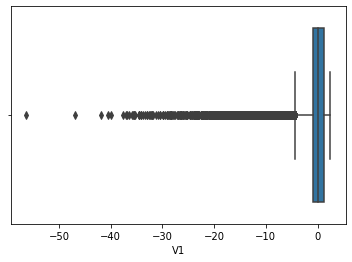

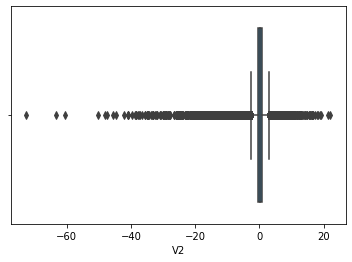

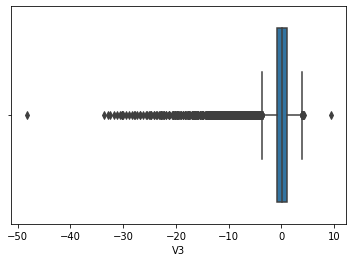

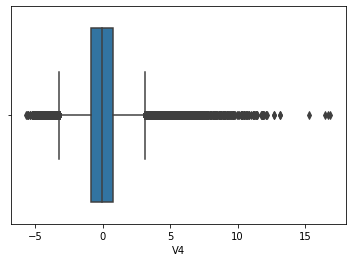

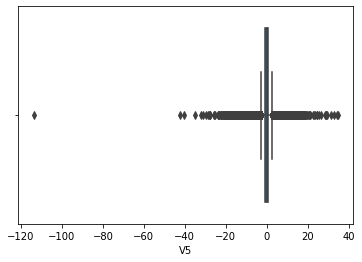

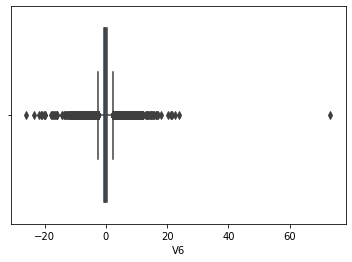

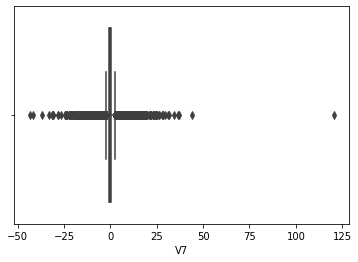

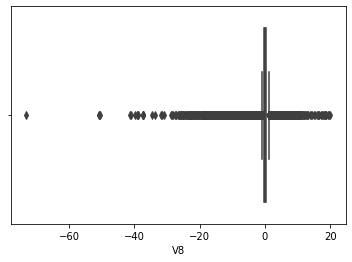

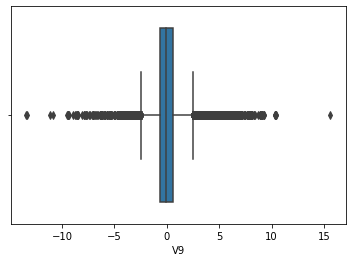

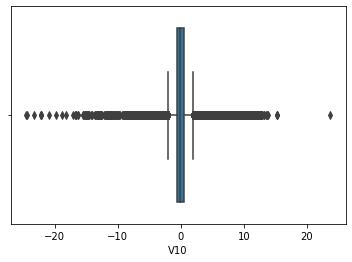

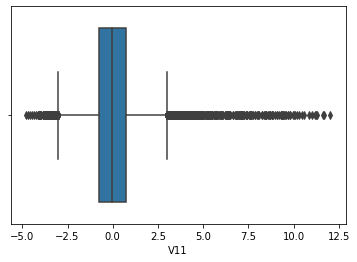

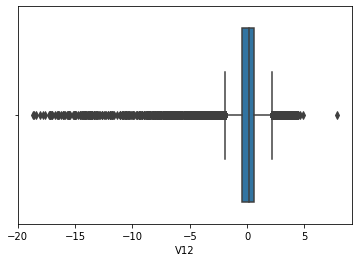

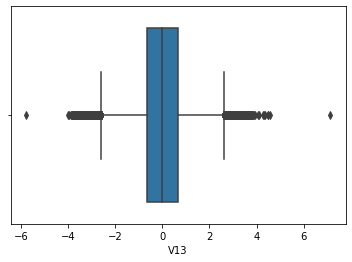

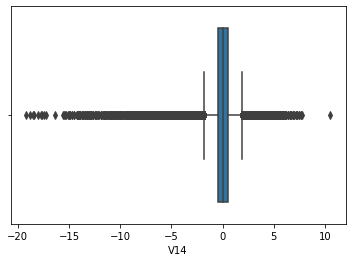

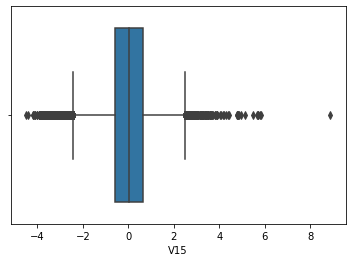

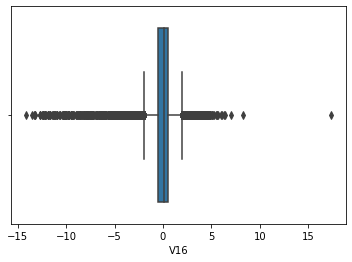

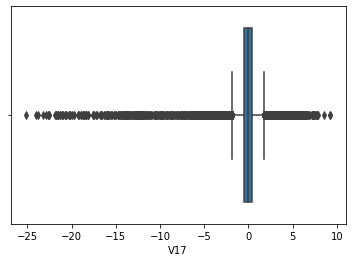

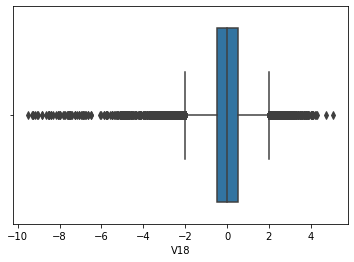

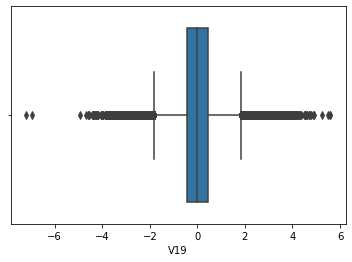

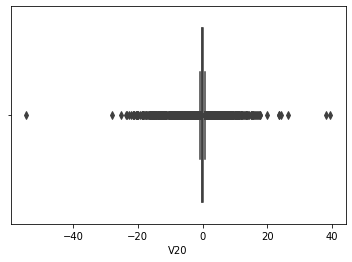

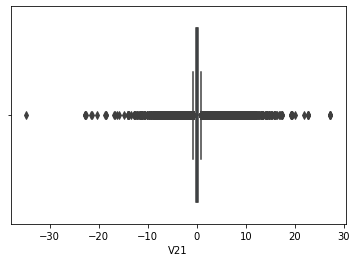

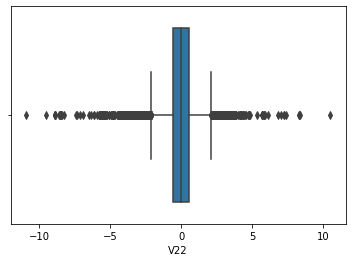

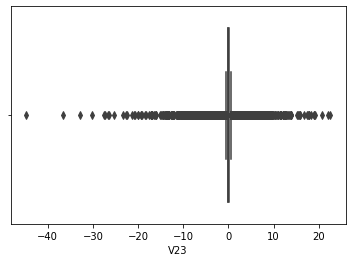

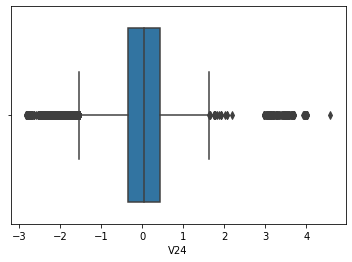

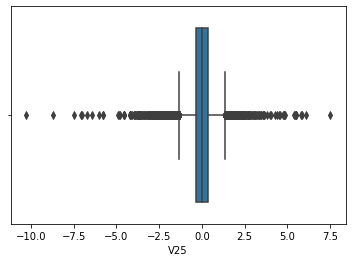

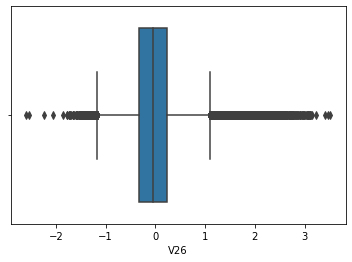

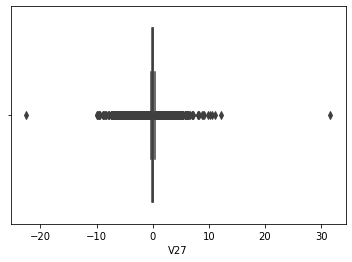

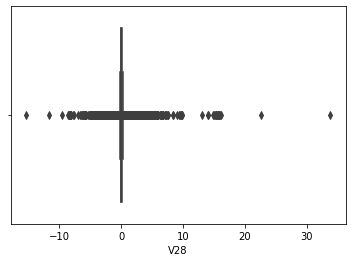

In [ ]:
#Boxplots for each column
for i in range(1,29):
  a = 'V' + str(i)
  sns.boxplot(x=df[a])#standard way of displaying the distribution of data
  plt.show()
  print('')

**Correlation:** it measures how strongly one variable depends on other.

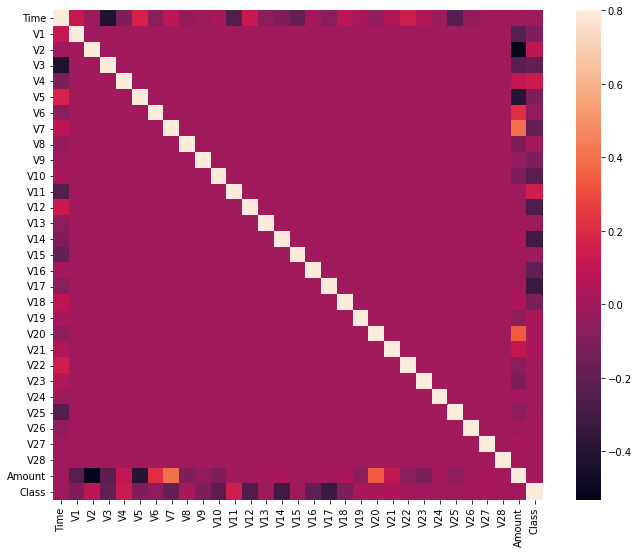

In [ ]:
#finding correlation using heatmap
fig = plt.figure(figsize=(12,9))
cm = df.corr() #correlation analysis calculates the level of change in one variable due to the change in the other.
sns.heatmap(cm, vmax = .8, square = True)# immediate visual summary of info by creating a grid like plot along with an optional color bar
#vmax?

In [ ]:
#dropping columns (by dropping some columnss, Space required to store the data is reduced)
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

In [ ]:
df.shape

(284807, 20)

In [ ]:
#normalizing the amount (to have a fixed range) and the eliminating the time and amount columns
#to standardize the data values into a standard format. According to the above syntax, we initially create an object of the StandardScaler() function. Further, we use fit_transform() along with the assigned object to transform the data and standardize it.
df['Amount_Stand'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time', 'Amount'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Class,Amount_Stand
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,0,-0.073403


In [ ]:
#sampling (as it is a imbalanced data set , it can cause prediction models to be over-trained and unable to correctly predict fraudulent transactions. so we need to do sampling )
x = df.drop('Class', axis=1) #features
y = df.Class #response
x

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount_Stand
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,-0.682920,0.213454,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,0.214205,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.577252,0.232045,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,2.897849,0.265245,-0.313249


In [ ]:
dataset_fraud = df[df['Class'] == 1]
#spliting the fraud data into x and y
dataset_fraud_x = dataset_fraud.drop(['Class'], axis = 1) #features
dataset_fraud_y = dataset_fraud['Class'] #response
not_fraud = df['Class'] == 0
#method from pandas library to randomly select rows from a DataFrame
#n=to specify the number of randomly selected rows or columns to be returned from the DataFrame
#replace:It is used to specify if the same row or column can be returned more than once or not(true means same values can be added)
dataset_not_fraud = df[not_fraud].sample(n=len(dataset_fraud_x), replace = True, random_state = 1)#no.of frauds=no. of not frauds

In [ ]:
#spliting the not fraud data into x and y
dataset_not_fraud_x = dataset_not_fraud.drop(['Class'], axis=1) #features #axis: int or string value, 0 ‘index’ for Rows and 1 ‘columns’ for Columns.(default=0)
dataset_not_fraud_y = dataset_not_fraud['Class'] #response
#Concatenate
X = np.concatenate((dataset_not_fraud_x.values, dataset_fraud_x.values)) #features
Y = np.concatenate((dataset_not_fraud_y.values, dataset_fraud_y.values)) #response
fraud = pd.concat([dataset_not_fraud_x, dataset_fraud_x])
not_fraud = pd.concat([dataset_not_fraud_y, dataset_fraud_y])
dataset = pd.concat([fraud, not_fraud], axis = 1)

**Construction of a new dataset**: (After sampling, This dataset will be having equal probability of both the fraud
transactions and normal transcations).

In [ ]:
print(dataset)

              V1        V2        V3        V4        V5        V6        V7  \
128297 -0.433654  1.054817  1.702420  0.044889 -0.235106 -1.087976  0.704813   
267816  1.940544 -0.208672 -0.064282  0.546145 -0.789493 -0.878535 -0.368556   
73527  -0.361282  0.824714  1.979199  0.212037  0.133381 -0.400738  0.755210   
117827  1.097337 -0.760035  0.582568 -1.377170 -0.836258  0.326573 -0.764995   
21526   0.537376 -1.200021  0.793836  0.887955 -1.183169  0.174441 -0.250741   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
281674  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

              V9       V10       V11   

Text(0.5, 1.0, 'Equally Distributed Classes')

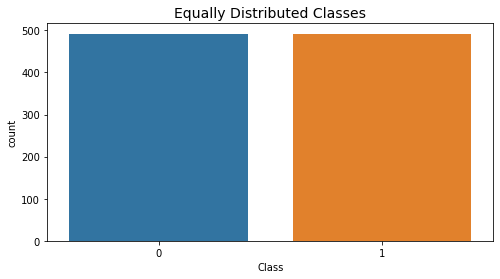

In [ ]:
#ploting no of fraud and non fraud transactions after sampling
plt.figure(figsize=(8,4))
sns.countplot(x='Class',data=dataset)
plt.title('Equally Distributed Classes', fontsize=14)

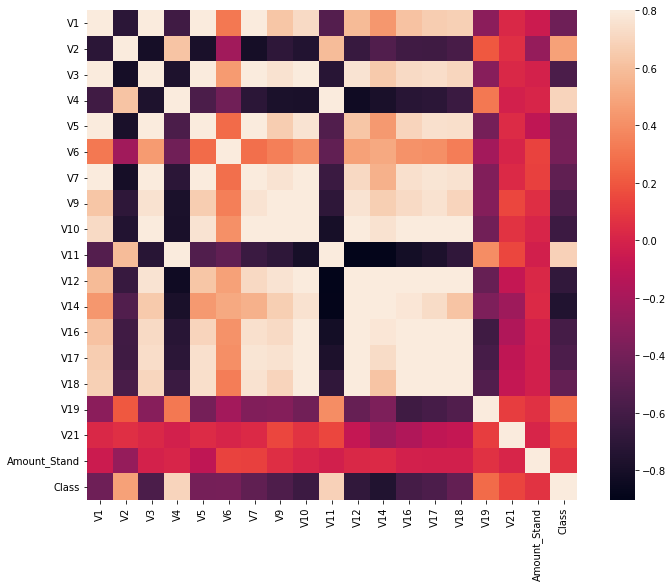

In [ ]:
#finding correlation using heatmap
fig = plt.figure(figsize=(12,9))
corr = dataset.corr()
sns.heatmap(corr, vmax = .8, square = True)# immediate visual summary of info by creating a grid like plot along with an optional c

In [ ]:
#features with high negative correlation and high positive correlation are identified
#A negative correlation is when two variables move opposite one another so that when one variable rises, the other falls.
corr[corr.Class < 0] # features with high negative correlation

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount_Stand,Class
V1,1.000000,-0.702679,0.870904,-0.611386,0.828708,0.320869,0.866898,0.631400,0.722780,-0.525758,0.581980,0.435557,0.620381,0.664382,0.680207,-0.306292,0.024732,-0.050690,-0.422037
V3,0.870904,-0.808630,1.000000,-0.765705,0.854788,0.449987,0.886168,0.758361,0.855837,-0.716736,0.761126,0.653428,0.726684,0.737438,0.703360,-0.322136,0.026139,-0.008481,-0.563863
V5,0.828708,-0.783735,0.854788,-0.568225,1.000000,0.269526,0.828628,0.662233,0.761325,-0.538699,0.629890,0.442887,0.694387,0.747860,0.744375,-0.396302,0.037933,-0.098715,-0.391366
V6,0.320869,-0.221776,0.449987,-0.413424,0.269526,1.000000,0.286497,0.343276,0.414012,-0.473742,0.480632,0.511508,0.416910,0.403687,0.340452,-0.214569,0.008295,0.133698,-0.387447
V7,0.866898,-0.806238,0.886168,-0.706691,0.828628,0.286497,1.000000,0.762839,0.866939,-0.638553,0.718357,0.541476,0.747064,0.767264,0.758540,-0.346721,0.032178,0.127887,-0.477398
V9,0.631400,-0.693199,0.758361,-0.776757,0.662233,0.343276,0.762839,1.000000,0.842721,-0.691032,0.765731,0.670823,0.724836,0.755798,0.695029,-0.334838,0.147195,0.053966,-0.550964
V10,0.722780,-0.744456,0.855837,-0.787299,0.761325,0.414012,0.866939,0.842721,1.000000,-0.800851,0.883865,0.759678,0.855196,0.852792,0.800341,-0.406501,0.071113,0.012300,-0.633792
V12,0.581980,-0.649853,0.761126,-0.828910,0.629890,0.480632,0.718357,0.765731,0.883865,-0.901752,1.000000,0.879992,0.902944,0.877283,0.797761,-0.451032,-0.084018,0.023860,-0.682082
V14,0.435557,-0.541129,0.653428,-0.785276,0.442887,0.511508,0.541476,0.670823,0.759678,-0.892459,0.879992,1.000000,0.776879,0.729839,0.622533,-0.362795,-0.231166,0.035467,-0.750084
V16,0.620381,-0.612705,0.726684,-0.718183,0.694387,0.416910,0.747064,0.724836,0.855196,-0.810393,0.902944,0.776879,1.000000,0.951088,0.910238,-0.619866,-0.160925,-0.015481,-0.595878


In [ ]:
#A positive correlation exists when two variables operate in unison so that when one variable rises or falls, the other does the same. 
corr[corr.Class > 0] # features with high positive correlation

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount_Stand,Class
V2,-0.702679,1.000000,-0.808630,0.624639,-0.783735,-0.221776,-0.806238,-0.693199,-0.744456,0.590971,-0.649853,-0.541129,-0.612705,-0.617359,-0.580715,0.204589,0.057377,-0.268018,0.474854
V4,-0.611386,0.624639,-0.765705,1.000000,-0.568225,-0.413424,-0.706691,-0.776757,-0.787299,0.795176,-0.828910,-0.785276,-0.718183,-0.703174,-0.637387,0.314982,-0.016773,0.010101,0.696530
V11,-0.525758,0.590971,-0.716736,0.795176,-0.538699,-0.473742,-0.638553,-0.691032,-0.800851,1.000000,-0.901752,-0.892459,-0.810393,-0.773697,-0.683044,0.397651,0.143346,-0.023145,0.685234
V19,-0.306292,0.204589,-0.322136,0.314982,-0.396302,-0.214569,-0.346721,-0.334838,-0.406501,0.397651,-0.451032,-0.362795,-0.619866,-0.585053,-0.538874,1.000000,0.114005,0.064435,0.270966
V21,0.024732,0.057377,0.026139,-0.016773,0.037933,0.008295,0.032178,0.147195,0.071113,0.143346,-0.084018,-0.231166,-0.160925,-0.100446,-0.081608,0.114005,1.000000,0.009131,0.138632
Amount_Stand,-0.050690,-0.268018,-0.008481,0.010101,-0.098715,0.133698,0.127887,0.053966,0.012300,-0.023145,0.023860,0.035467,-0.015481,-0.017680,-0.018931,0.064435,0.009131,1.000000,0.069029
Class,-0.422037,0.474854,-0.563863,0.696530,-0.391366,-0.387447,-0.477398,-0.550964,-0.633792,0.685234,-0.682082,-0.750084,-0.595878,-0.557017,-0.463156,0.270966,0.138632,0.069029,1.000000


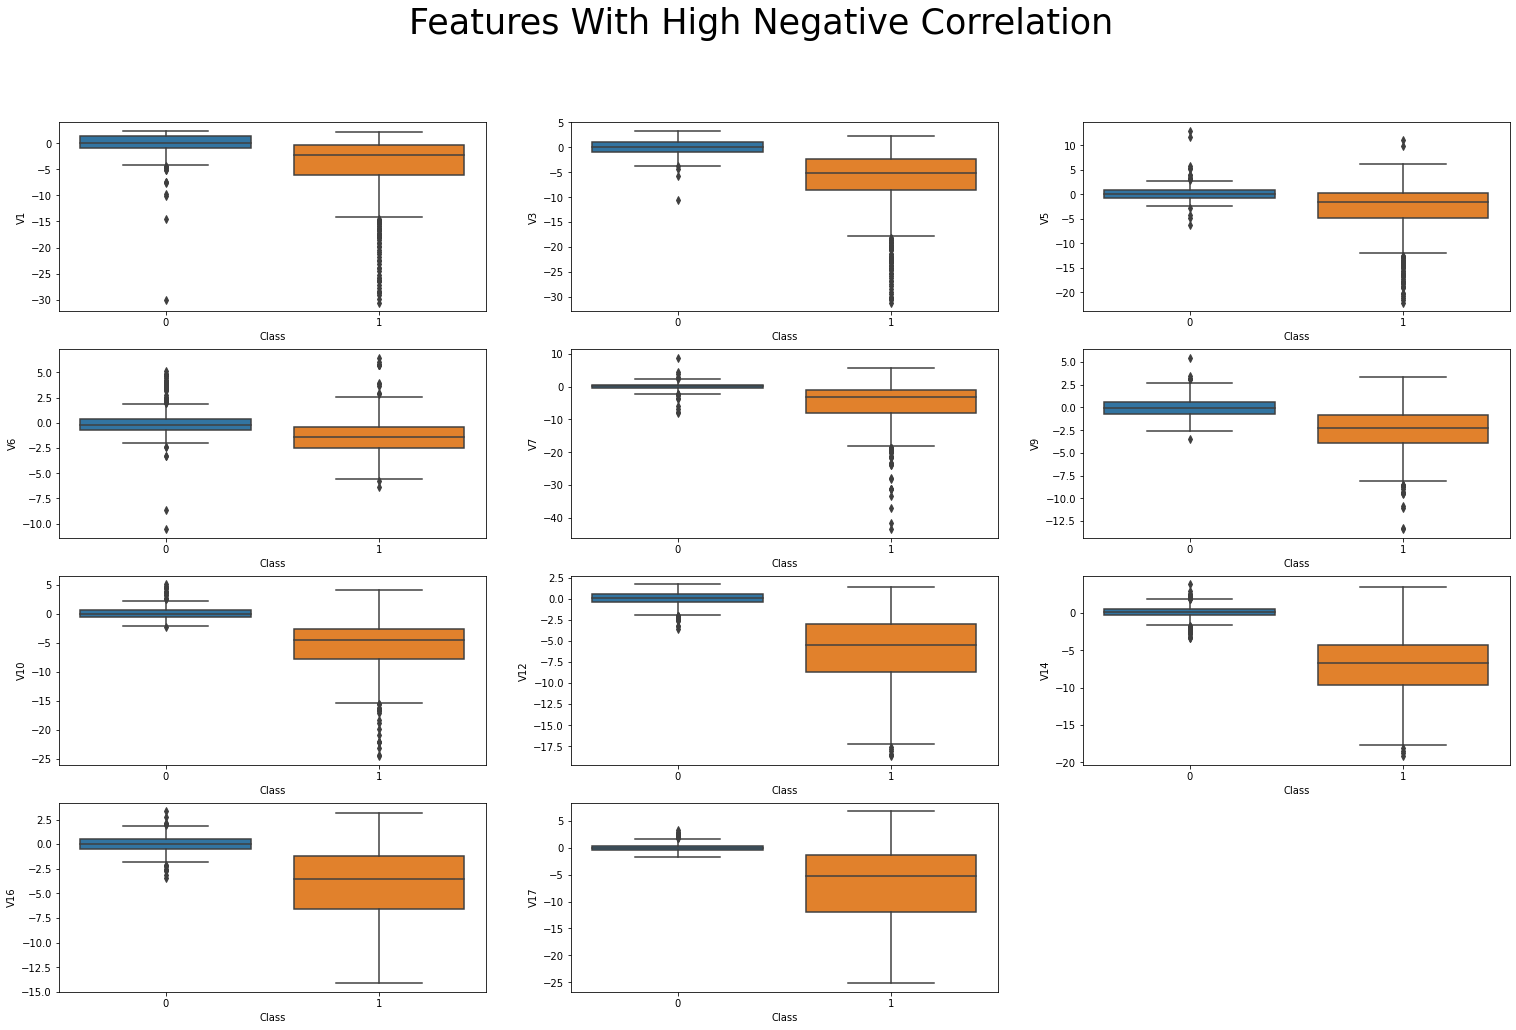

In [ ]:
#visualizing the features with high negative correlation
f, axes = plt.subplots(nrows=4, ncols=3, figsize=(26,16))
f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V1", data=dataset, ax=axes[0,0])
sns.boxplot(x="Class", y="V3", data=dataset, ax=axes[0,1])
sns.boxplot(x="Class", y="V5", data=dataset, ax=axes[0,2])
sns.boxplot(x="Class", y="V6", data=dataset, ax=axes[1,0])
sns.boxplot(x="Class", y="V7", data=dataset, ax=axes[1,1])
sns.boxplot(x="Class", y="V9", data=dataset, ax=axes[1,2])
sns.boxplot(x="Class", y="V10", data=dataset, ax=axes[2,0])
sns.boxplot(x="Class", y="V12", data=dataset, ax=axes[2,1])
sns.boxplot(x="Class", y="V14", data=dataset, ax=axes[2,2])
sns.boxplot(x="Class", y="V16", data=dataset, ax=axes[3,0])
sns.boxplot(x="Class", y="V17", data=dataset, ax=axes[3,1])
sns.boxplot(x="Class", y="V18", data=dataset, ax=axes[3,2])
f.delaxes(axes[3,2])

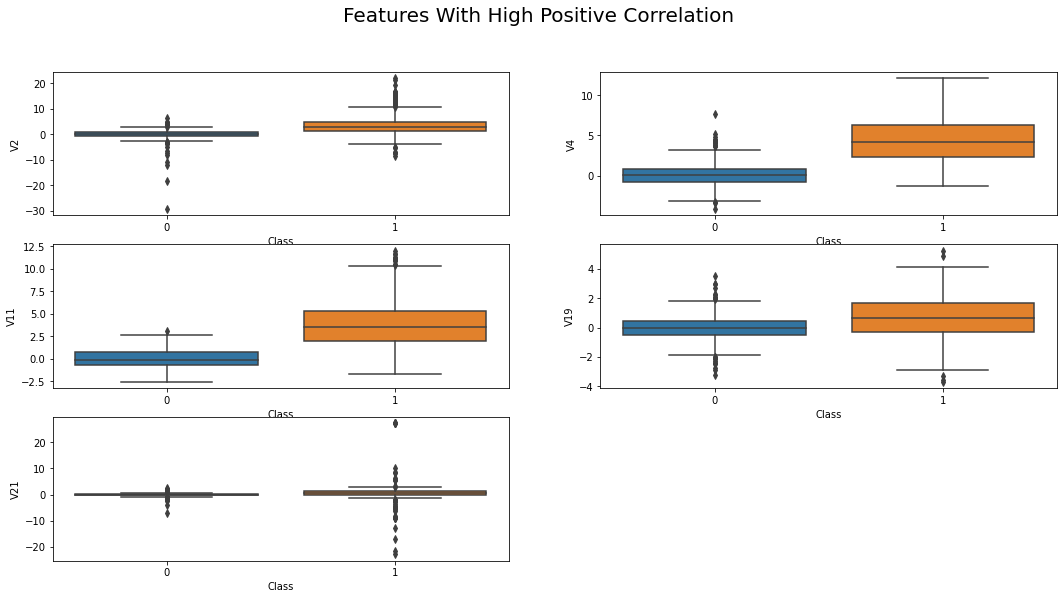

In [ ]:
#visualizing the features with high positive correlation
f, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,9))
f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V2", data=dataset, ax=axes[0,0])
sns.boxplot(x="Class", y="V4", data=dataset, ax=axes[0,1])
sns.boxplot(x="Class", y="V11", data=dataset, ax=axes[1,0])
sns.boxplot(x="Class", y="V19", data=dataset, ax=axes[1,1])
sns.boxplot(x="Class", y="V21", data=dataset, ax=axes[2,0])
f.delaxes(axes[2,1])

In [ ]:
#Partition of the data set: (80% of the data for training the machine and 20% for testing the machine).
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

**Algorithms compared**: 

Neural network (MLP classifier),Random forestClassifier, kNNClassifier, svc, Naive Bayes,
Decision treeClassifier,Logistic regression

In [ ]:
MLA = [MLPClassifier(hidden_layer_sizes=(3,1,), activation = 'relu',solver='adam', alpha
= 1, max_iter = 2000, random_state = 1),#neural networks
RandomForestClassifier(n_jobs=-1),
KNeighborsClassifier(n_neighbors=3),
SVC(kernel='linear', C=1, random_state=0),
naive_bayes.GaussianNB(),#naive bayes
tree.DecisionTreeClassifier(max_depth=3),
LogisticRegression(penalty='l2', solver = 'lbfgs', random_state = 0, max_iter
=1000)]

**confusion matrix**(to measure performance of the model)

True Negative: Model has given prediction No, and the real or actual value was also No.

True Positive: The model has predicted yes, and the actual value was also true.

False Negative: The model has predicted no, but the actual value was Yes, it is also called as Type-II error.

False Positive: The model has predicted Yes, but the actual value was No. It is also called a Type-I error.

MLPClassifier
tn, fp, fn, tp
0.48223350253807107 0.04060913705583756 0.03553299492385787 0.4416243654822335
specificity: 0.9223300970873787
sensitivity: 0.925531914893617


[[95  8]
 [ 7 87]]




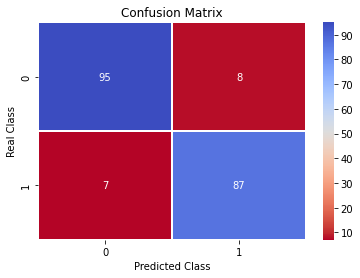

RandomForestClassifier
tn, fp, fn, tp
0.49238578680203043 0.030456852791878174 0.03553299492385787 0.4416243654822335
specificity: 0.941747572815534
sensitivity: 0.925531914893617


[[97  6]
 [ 7 87]]




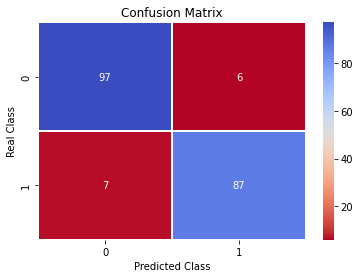

KNeighborsClassifier
tn, fp, fn, tp
0.47715736040609136 0.04568527918781726 0.03553299492385787 0.4416243654822335
specificity: 0.912621359223301
sensitivity: 0.925531914893617


[[94  9]
 [ 7 87]]




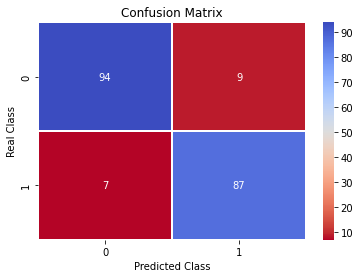

SVC
tn, fp, fn, tp
0.49746192893401014 0.025380710659898477 0.03553299492385787 0.4416243654822335
specificity: 0.9514563106796117
sensitivity: 0.925531914893617


[[98  5]
 [ 7 87]]




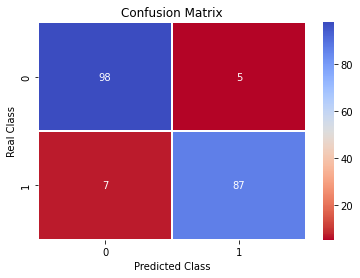

GaussianNB
tn, fp, fn, tp
0.5126903553299492 0.01015228426395939 0.04568527918781726 0.43147208121827413
specificity: 0.9805825242718447
sensitivity: 0.9042553191489362


[[101   2]
 [  9  85]]




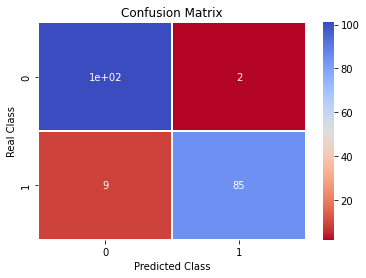

DecisionTreeClassifier
tn, fp, fn, tp
0.49238578680203043 0.030456852791878174 0.030456852791878174 0.4467005076142132
specificity: 0.941747572815534
sensitivity: 0.9361702127659575


[[97  6]
 [ 6 88]]




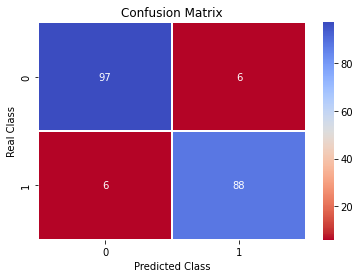

LogisticRegression
tn, fp, fn, tp
0.49746192893401014 0.025380710659898477 0.030456852791878174 0.4467005076142132
specificity: 0.9514563106796117
sensitivity: 0.9361702127659575


[[98  5]
 [ 6 88]]




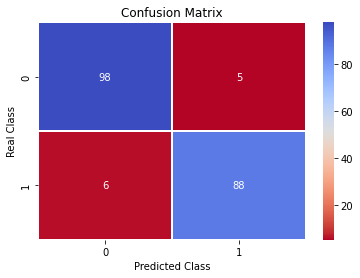

In [ ]:
i=1
for alg in MLA:
  ypredicted = alg.fit(X_train, y_train).predict(X_test)
  cm=confusion_matrix(y_test,ypredicted)
  print(alg.__class__.__name__)
  tn, fp, fn, tp = confusion_matrix(y_test, ypredicted).ravel()#multi_D to 1D(FLATTEN)
  print("tn, fp, fn, tp")
  t=tp+tn+fn+fp
  print(tn/t, fp/t, fn/t, tp/t)
  print("specificity: "+str(tn/(tn+fp)))
  print("sensitivity: "+str(tp/(tp+fn)))
  print('\n')
  print(cm)
  print('\n')
  sns.heatmap(cm, cmap="coolwarm_r", annot=True, linewidths=0.5)
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Class")
  plt.ylabel("Real Class")
  plt.show()
  i+=1
  
print('')

**ROC**(reciever operating characteristic curve)

is a metric used to measure the performance of a classifier model

MLPClassifier


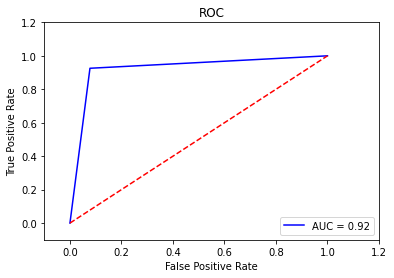





RandomForestClassifier


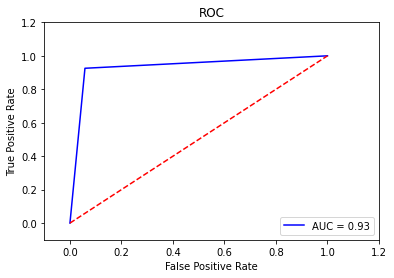





KNeighborsClassifier


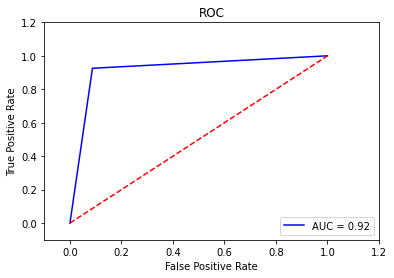





SVC


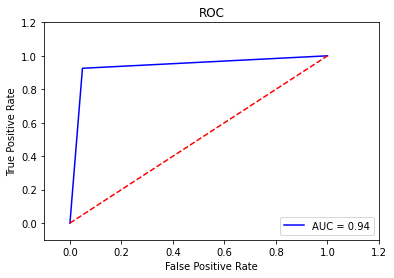





GaussianNB


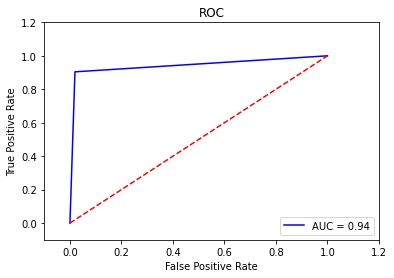





DecisionTreeClassifier


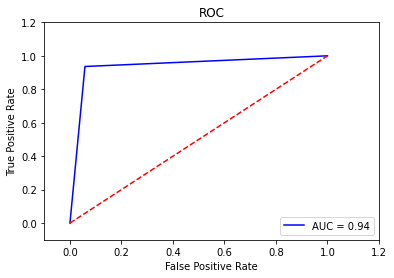





LogisticRegression


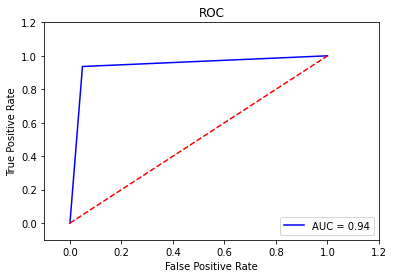

In [ ]:
i=1
for alg in MLA:
  ypredicted = alg.fit(X_train, y_train).predict(X_test)
  fp, tp, th = roc_curve(y_test, ypredicted)
  auc_new = auc(fp, tp)
  print(alg.__class__.__name__)
  plt.title('ROC')
  plt.plot(fp, tp, 'b', label='AUC = %0.2f'% auc_new)
  plt.legend(loc='lower right')
  plt.plot([0,1],[0,1],'r--')
  plt.xlim([-0.1,1.2])
  plt.ylim([-0.1,1.2])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  i+=1
  print('\n')
  print('\n')

print('')

Creating a dataframe and adding rows and columns

In [ ]:
MLA_op = pd.DataFrame()
t0 = time.time()
row = 0
for alg in MLA:
  ypredicted = alg.fit(X_train, y_train).predict(X_test)
  t1 = time.time()
  fp, tp, th = roc_curve(y_test, ypredicted)
  MLA_name = alg.__class__.__name__
  MLA_op.loc[row,'MLA Name'] = MLA_name
  MLA_op.loc[row, 'AUC'] = auc(fp, tp)
  MLA_op.loc[row, 'Accuracy']=accuracy_score(y_test, ypredicted)
  MLA_op.loc[row, 'Precision'] = precision_score(y_test, ypredicted)
  MLA_op.loc[row, 'f1 score']=f1_score(y_test, ypredicted, average='weighted', labels=
  np.unique(ypredicted))
  MLA_op.loc[row, 'recall']=recall_score(y_test, ypredicted, average='micro')
  MLA_op.loc[row, 'cross_val_score']=cross_val_score(alg, X_train, y_train,cv=10, scoring='accuracy').mean()
  tn, fp, fn, tp = confusion_matrix(y_test, ypredicted).ravel()
  MLA_op.loc[row, 'sensitivity']=str(tn/(tn+fp))
  MLA_op.loc[row, 'specificity']=str(tp/(tp+fn))
  MLA_op.loc[row, 'time taken(sec)'] =t1-t0
  row+=1
MLA_op.sort_values(by = ['AUC'], ascending = False, inplace = True)
MLA_op

,MLA Name,AUC,Accuracy,Precision,f1 score,recall,cross_val_score,sensitivity,specificity,time taken(sec)
6,LogisticRegression,0.943813,0.944162,0.946237,0.944148,0.944162,0.928822,0.9514563106796117,0.9361702127659575,29.559883
4,GaussianNB,0.942419,0.944162,0.977011,0.944000,0.944162,0.910987,0.9805825242718447,0.9042553191489362,29.449992
5,DecisionTreeClassifier,0.938959,0.939086,0.936170,0.939086,0.939086,0.914784,0.941747572815534,0.9361702127659575,29.480968
3,SVC,0.938494,0.939086,0.945652,0.939052,0.939086,0.928822,0.9514563106796117,0.925531914893617,29.234305
1,RandomForestClassifier,0.933640,0.934010,0.935484,0.933993,0.934010,0.937699,0.941747572815534,0.925531914893617,23.935545
0,MLPClassifier,0.923931,0.923858,0.915789,0.923874,0.923858,0.933934,0.9223300970873787,0.925531914893617,1.815171
2,KNeighborsClassifier,0.919077,0.918782,0.906250,0.918811,0.918782,0.931386,0.912621359223301,0.925531914893617,29.120986


**conclusion :**

After Analyzing the output we found that logisticRegression method is the best method to detect the credit card
fraud transcations, as it has highest area under curve (AUC) when compared to other Machine learning
algorithms.

In [31]:
#To test if the record is fraud or not. Run algorithms separately in different cells and use the algorithm which gives best accuracy to test the record
#x_record=[-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,1.160686]
#result=foundBestAlgorithm.predict(x_record)